# Final NeuroAI Project
## Group 1: Femke, Tikva and Gabriela

In [8]:
# Importing everything important. 
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as sp
import matplotlib.image as mpimg
import os
from glob import glob
from PIL import Image
import random

In [9]:
# Function for cleaning the image and making its noisy version.
def imageGenerator(imageVector):
    # Normalize to [0, 1] if pixel values are 0–255
    imageVector = imageVector.astype(float)
    imageVector /= np.max(imageVector)
    
    # Create ±1 clean image
    cleanImage = np.where(imageVector > 0.5, 1, -1)
    
    # Add mild Gaussian noise
    noisyImage = cleanImage + np.random.normal(0, 0.8, cleanImage.shape)
    
    # Threshold back to ±1
    noisyImage = np.where(noisyImage >= 0, 1, -1)
    

    return cleanImage, noisyImage

In [10]:
# Function that trains the model, according to the hebbian learn. 

def trainer(vector, oldCoefMat):
    vector = vector.flatten()
    N = len(vector)
    
    # Create NxN matrix, not (N-1)x(N-1)
    coefMat = np.zeros((N, N))
    
    # Hebbian learning rule: W_ij = x_i * x_j, i ≠ j
    for i in range(N):
        for j in range(N):
            if i != j:
                coefMat[i, j] = vector[i] * vector[j]
    
    # If this is the first image, return coefMat
    if np.isscalar(oldCoefMat):
        return coefMat
    else:
        # Add to previous learned weights
        return oldCoefMat + coefMat


In [11]:
# --- Hopfield recall ---
def prediction(corruptedVec, coefMat):
    corruptedVec = corruptedVec.flatten()
    predictVec = np.zeros(len(corruptedVec))
    
    for i in range(len(corruptedVec) - 1):
        temp = 0
        for j in range(len(corruptedVec)-1):
             temp += coefMat[i][j] * corruptedVec[j]
        if (temp>0):
            predictVec[i] = 1
        if (temp<0):
            predictVec[i] = -1
    
    predictVec = np.reshape(predictVec, [int(np.sqrt(len(predictVec))),int(np.sqrt(len(predictVec)))])
    return predictVec

In [12]:
# Loading the images from the folder. Along converting them to grayscale, rescaling them and normalizing them. 

def load_images_from_folder(folder, image_size=(128, 128)):
    image_paths = []
    for ext in ('*.png', '*.jpg', '*.jpeg'):
        image_paths.extend(glob(os.path.join(folder, '**', ext), recursive=True))

    images = []
    for path in image_paths:
        img = Image.open(path).convert('L')  # convert to grayscale
        img = img.resize(image_size)         # proper rescaling
        img = np.array(img, dtype=float) / 255.0  # normalize to [0,1]
        images.append(img)
    
    print(f"Loaded {len(images)} images from {folder}")
    return images

Loaded 557 images from data/train
Loaded 140 images from data/test


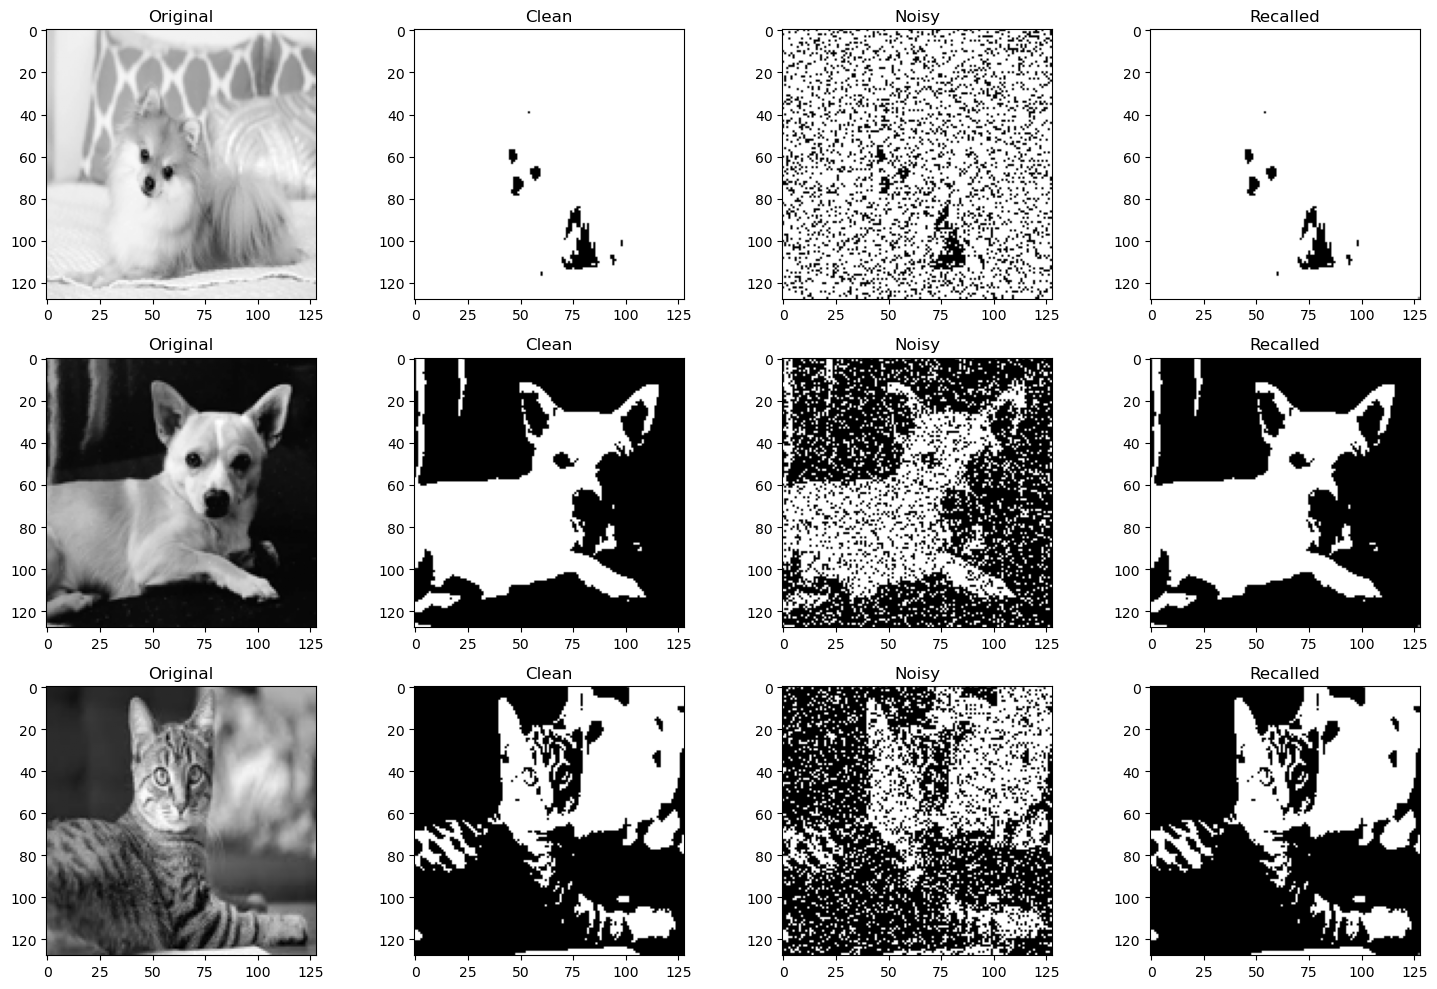

In [13]:
# --- Main ---
train_dir = "data/train"
test_dir = "data/test"

train_images = load_images_from_folder(train_dir)
test_images = load_images_from_folder(test_dir)
# print(test_images)

plt.figure(figsize=(15, 10))
coefMatrix = 0

# Pick 3 random images
selected_images = random.sample(train_images, 3)

for i, image in enumerate(selected_images):
    if (i==1):
        vector,noisyVec = imageGenerator(image)
        coefMatrix = trainer(vector,0)
        predictedVec = prediction(noisyVec,coefMatrix)
    else:
        vector,noisyVec = imageGenerator(image)
        coefMatrix = trainer(vector,coefMatrix)
        predictedVec = prediction(noisyVec,coefMatrix)


    plt.subplot(len(selected_images), 4, 4*i + 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')

    plt.subplot(len(selected_images), 4, 4*i + 2)
    plt.imshow(vector, cmap='gray')
    plt.title('Clean')

    plt.subplot(len(selected_images), 4, 4*i + 3)
    plt.imshow(noisyVec, cmap='gray')
    plt.title('Noisy')

    plt.subplot(len(selected_images), 4, 4*i + 4)
    plt.imshow(predictedVec, cmap='gray')
    plt.title('Recalled')

plt.tight_layout()
plt.savefig('hopfield_results.png')
plt.show()

### Original Code 
#### From: https://github.com/nosratullah/hopfieldNeuralNetwork?tab=readme-ov-file

In [14]:
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as sp
import matplotlib.image as img

# import the image and extract
def imageGenerator(imageVector):
    cleanImage = np.zeros([len(imageVector)-1,len(imageVector)-1])
    for i in range(len(imageVector)-1):
        for j in range(len(imageVector)-1):
            if (imageVector[i][j] > 1):
                cleanImage[i][j] = 1
            else:
                cleanImage[i][j] = -1
    noisyImage = cleanImage + np.random.normal(0, 2, [len(image)-1,len(image)-1])

    for i in range(len(image)-1):
        for j in range(len(image)-1):
            if (noisyImage[i][j] >= 0):
                noisyImage[i][j] = 1
            else:
                noisyImage[i][j] = -1

    return cleanImage,noisyImage
# Building up the coefficient matrix
def trainer(vector,oldCoefMat):
    vector = vector.flatten()
    coefMat = np.zeros([len(vector)-1,len(vector)-1])
    if (np.isscalar(oldCoefMat)):
        for i in range(len(vector)-1):
            for j in range(len(vector)-1):
                if (i!=(i-j)):
                    coefMat[i][i-j] = vector[i]*vector[i-j]
    if (np.shape(oldCoefMat) == np.shape(coefMat)):
        for i in range(len(vector)-1):
            for j in range(len(vector)-1):
                if (i!=(i-j)):
                    coefMat[i][i-j] = vector[i]*vector[i-j]
        coefMat = coefMat + oldCoefMat

    vector = np.reshape(vector, [int(np.sqrt(len(vector))),int(np.sqrt(len(vector)))])
    return coefMat

#
def prediction(curuptedVec,coefMat):
    curuptedVec = curuptedVec.flatten()
    predictVec = np.zeros(len(curuptedVec))
    for i in range(len(curuptedVec)-1):
        temp = 0
        for j in range(len(curuptedVec)-1):
             temp += coefMat[i][j] * curuptedVec[j]
        if (temp>0):
            predictVec[i] = 1
        if (temp<0):
            predictVec[i] = -1

    predictVec = np.reshape(predictVec, [int(np.sqrt(len(predictVec))),int(np.sqrt(len(predictVec)))])
    return predictVec


#Import the images
plt.figure(figsize=(15,10))
for i in range(1,4):
    image = img.imread('dataset/pgms/{}.png'.format(i),'w').copy()
    if (i==1):
        vector,noisyVec = imageGenerator(image)
        coefMatrix = trainer(vector,0)
        predictedVec = prediction(noisyVec,coefMatrix)
    else:
        vector,noisyVec = imageGenerator(image)
        coefMatrix = trainer(vector,coefMatrix)
        predictedVec = prediction(noisyVec,coefMatrix)

    plt.subplot(i,4,1)
    plt.imshow(image)
    plt.title('Imported Picture 1')
    plt.subplot(i,4,2)
    plt.imshow(vector);
    plt.title('Cleaned and Squared Picture 1')
    plt.subplot(i,4,3)
    plt.imshow(noisyVec);
    plt.title('Noisy Picture 1')
    plt.subplot(i,4,4)
    plt.imshow(predictedVec);
    plt.title('Recalled Picture 1')

plt.savefig('hopfields.png')
plt.clf()
plt.imshow(coefMatrix)
plt.savefig('matrix.png')
plt.title('Coefficient Matrix')
plt.show()
"""

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/pgms/1.png'

<Figure size 1500x1000 with 0 Axes>